In [1]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

(512, 512, 3)
(512, 512, 3)
(512, 512)


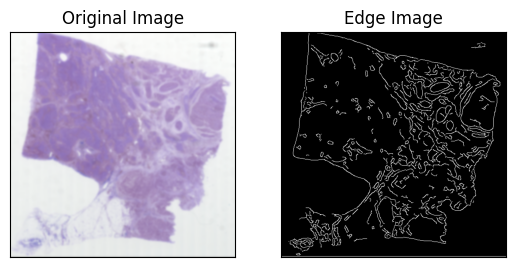

In [2]:
# img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/miccai/rescale-images-16384/rescaled_image_0_16384x16384.png')
# img = cv.imread('/Volumes/data/dataset/test/n04525038_35823.JPEG')
# img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
img = cv.imread('/Users/zhangenzhi/work/apt/dataset/paip_image.png')

img = cv.resize(img, (512,512))
print(img.shape)
grey_img = cv.GaussianBlur(img, (3,3), 0)
print(grey_img.shape)
edges = cv.Canny(grey_img, 20, 50)
print(edges.shape)

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

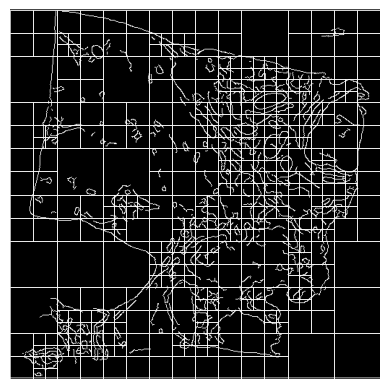

424


In [3]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=424)
qdt.draw(ax=ax)
ax.axis('off')
plt.show()
print(qdt.count_patches())
plt.close()

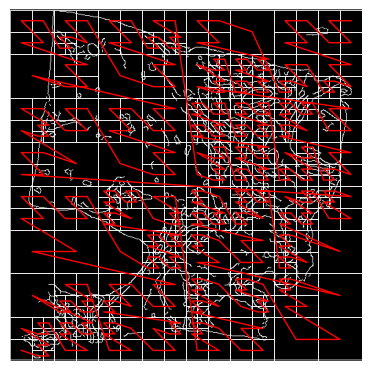

424


In [4]:
# Z-order plot
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
# qdt = FixedQuadTree(domain=edges, fixed_length=424)
ax.axis('off')
qdt.draw(ax=ax)
qdt.draw_zorder(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()

In [5]:
qdt.encode_nodes()

[[0, 32, 480, 512],
 [32, 48, 496, 512],
 [48, 64, 496, 512],
 [32, 48, 480, 496],
 [48, 64, 480, 496],
 [0, 32, 448, 480],
 [32, 48, 464, 480],
 [48, 64, 464, 480],
 [32, 48, 448, 464],
 [48, 64, 448, 464],
 [64, 96, 480, 512],
 [96, 128, 480, 512],
 [64, 80, 464, 480],
 [80, 96, 464, 480],
 [64, 80, 448, 464],
 [80, 96, 448, 464],
 [96, 112, 464, 480],
 [112, 128, 464, 480],
 [96, 112, 448, 464],
 [112, 128, 448, 464],
 [0, 64, 384, 448],
 [64, 80, 432, 448],
 [80, 96, 432, 448],
 [64, 80, 416, 432],
 [80, 96, 416, 432],
 [96, 112, 432, 448],
 [112, 128, 432, 448],
 [96, 112, 416, 432],
 [112, 128, 416, 432],
 [64, 96, 384, 416],
 [96, 128, 384, 416],
 [128, 160, 480, 512],
 [160, 192, 480, 512],
 [128, 144, 464, 480],
 [144, 160, 464, 480],
 [128, 144, 448, 464],
 [144, 160, 448, 464],
 [160, 192, 448, 480],
 [192, 224, 480, 512],
 [224, 256, 480, 512],
 [192, 224, 448, 480],
 [224, 240, 464, 480],
 [240, 256, 464, 480],
 [224, 240, 448, 464],
 [240, 256, 448, 464],
 [128, 144, 432,

In [6]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size, patch_size, channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

# mask=img
# seq = patchify(mask=mask)

# fig, ax = plt.subplots()
# mask= depatchify(seq=np.asarray(seq), channel=3)
# mask = mask.astype(np.uint8)
# ax.imshow(mask, cmap = 'gray')
# plt.show()
# plt.close()

In [7]:
# np.asarray(seq).shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-42..301].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-42..301].


(512, 512, 3)
(424, 8, 8, 3)
de mask: (512, 512, 3)


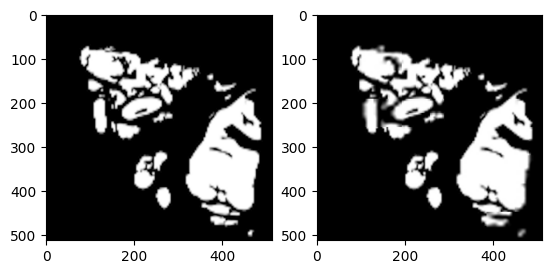

In [8]:
# mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Volumes/data/dataset/miccai/rescale-masks-16384/rescaled_image_0_16384x16384.png')
# mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.imread('/Users/zhangenzhi/work/apt/dataset/paip_mask.png')
mask = cv.resize(mask, (512, 512))
# mask = mask[:,:,0]
mask = mask.reshape((512, 512, 3))
print(mask.shape)

seq = patchify(mask=mask, patch_size=8, channel=3)
print(np.asarray(seq).shape)

plt.subplot(121)
plt.imshow(mask)
mask= depatchify(seq=seq, patch_size=8, channel=3)
mask = mask.astype(int)
plt.subplot(122)
plt.imshow(mask)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()


In [9]:
mask.shape

(512, 512, 3)

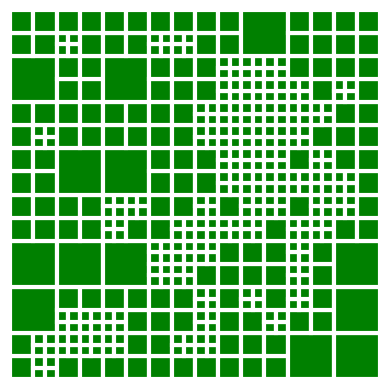

424


In [10]:
# Area plot
canvas = np.zeros([512,512,3],dtype=np.uint8)
canvas.fill(255) # or img[:] = 255

fig, ax = plt.subplots()
ax.imshow(canvas, cmap = 'gray')
qdt.draw_area(ax=ax, lw=3)
# Hide the axes
ax.axis('off')
plt.show()
print(qdt.count_patches())
plt.close()

In [ ]:
# Rescale plot
canvas = np.zeros([512,512,3],dtype=np.uint8)
canvas.fill(255) # or img[:] = 255

fig, ax = plt.subplots()
ax.imshow(canvas, cmap = 'gray')
qdt.draw_rescale(ax=ax, lw=3)
# Hide the axes
ax.axis('off')
plt.show()
print(qdt.count_patches())
plt.close()